In [276]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json
import numpy as np
import time

In [277]:
# URL for GET requests to retrieve vehicle data

url = "https://data.cms.gov/resource/97k6-zzx3.json"

# Create a variable for and print the response object to the console to make sure we have a connection to the API
Response = requests.get(url)
print(Response)


<Response [200]>


In [278]:
# Create a variable to hold the response data in json format
Response_Data = Response.json()

# print(json.dumps(Response_Data, indent=4, sort_keys=True))


In [279]:
# Generate a DataFrame from the response data
DataFrame = pd.DataFrame(Response_Data)

# Display top 5 rows of dataframe for reference

DataFrame.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_medicare_payments,average_medicare_payments_2
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


In [280]:
# Display a statistical overview of the DataFrame for reference

DataFrame.describe()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_medicare_payments,average_medicare_payments_2
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1,1000,974,999,683,47,957,282,92,1000,994,998
top,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50036,GOOD SAMARITAN HOSPITAL,800 WASHINGTON STREET,SPRINGFIELD,FL,76104,MA - Boston,11,22439.9,5986,4847.08
freq,1000,1,6,2,8,81,3,19,57,1,2,2


In [281]:
# Check to see if there are any incomplete rows
DataFrame.count()

drg_definition                          1000
provider_id                             1000
provider_name                           1000
provider_street_address                 1000
provider_city                           1000
provider_state                          1000
provider_zip_code                       1000
hospital_referral_region_description    1000
total_discharges                        1000
average_covered_charges                 1000
average_medicare_payments               1000
average_medicare_payments_2             1000
dtype: int64

In [282]:
# Calculate the Number of Unique Diagnosis Related Groups (DRGs): 
Unique_DRGs = len(DataFrame["drg_definition"].unique())
Unique_DRGs

1

In [283]:
# Calculate the Number of Unique Providers: 
Unique_Provider_count = len(DataFrame["provider_id"].unique())
Unique_Provider_count

1000

In [284]:
# Calculate the Total Number of Unique States in the DataFrame
Unique_State_Count = len(DataFrame["provider_state"].unique())
Unique_State_Count

47

In [285]:
# Calculate the Total Number of Unique Provider Zip Codes in the DataFrame
Unique_Provider_ZipCode_Count = len(DataFrame["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count

957

In [286]:
# Calculate the Unique Number of hospital_referral_region_description in the DataFrame
Unique_Hospital_Referral_Region_count = len(DataFrame["hospital_referral_region_description"].unique())
Unique_Hospital_Referral_Region_count

282

In [287]:
# Observe the DataTypes of each column
DataFrame.dtypes

drg_definition                          object
provider_id                             object
provider_name                           object
provider_street_address                 object
provider_city                           object
provider_state                          object
provider_zip_code                       object
hospital_referral_region_description    object
total_discharges                        object
average_covered_charges                 object
average_medicare_payments               object
average_medicare_payments_2             object
dtype: object

In [288]:
# Use pd.to_numeric() method to convert the datatype of the Discharge Count column
DataFrame['total_discharges'] = pd.to_numeric(DataFrame['total_discharges'])

# Use pd.to_numeric() method to convert the datatype of the Average Covered Charges column
DataFrame['average_covered_charges'] = pd.to_numeric(DataFrame['average_covered_charges'])

# Use pd.to_numeric() method to convert the datatype of the Average Medicare Payments column
DataFrame['average_medicare_payments'] = pd.to_numeric(DataFrame['average_medicare_payments'])

# Use pd.to_numeric() method to convert the datatype of the Average Medicare Payments 2 column
DataFrame['average_medicare_payments_2'] = pd.to_numeric(DataFrame['average_medicare_payments_2'])

In [289]:
# Observe the updated DataTypes of each column
DataFrame.dtypes

drg_definition                           object
provider_id                              object
provider_name                            object
provider_street_address                  object
provider_city                            object
provider_state                           object
provider_zip_code                        object
hospital_referral_region_description     object
total_discharges                          int64
average_covered_charges                 float64
average_medicare_payments               float64
average_medicare_payments_2             float64
dtype: object

In [290]:
# Calculate the Total Number of Discharges in the DataFrame
Discharge_Count = (DataFrame["total_discharges"].sum())
Discharge_Count

31334

In [291]:
# Cacluate the average covered charges amount
Average_Covered_Charges = DataFrame["average_covered_charges"].mean()
Average_Covered_Charges

30764.52741

In [292]:
# Cacluate the max covered charge amount
Max_Covered_Charges = DataFrame["average_covered_charges"].max()
Max_Covered_Charges

146892.0

In [293]:
# Cacluate the min covered charge amount
Min_Covered_Charges = DataFrame["average_covered_charges"].min()
Min_Covered_Charges

5981.05

In [294]:
# Create a summary data frame to hold the Analysis Results

DRG_Analysis_df = pd.DataFrame([
    {"Unique DRGs": Unique_DRGs, 
     "Unique Providers": Unique_Provider_count, 
     "Unique Provider States": Unique_State_Count, 
     "Unique Provider Zip Codes": Unique_Provider_ZipCode_Count, 
     "Unique Regions": Unique_Hospital_Referral_Region_count,
     "Total Discharge Count": Discharge_Count,
     "Average Charge": Average_Covered_Charges,
     "Max Charge": Max_Covered_Charges,
     "Min Charge": Min_Covered_Charges
    }
])
DRG_Analysis_df

,Unique DRGs,Unique Providers,Unique Provider States,Unique Provider Zip Codes,Unique Regions,Total Discharge Count,Average Charge,Max Charge,Min Charge
0,1,1000,47,957,282,31334,30764.52741,146892.0,5981.05


In [295]:
# Give the displayed data cleaner formatting

DRG_Analysis_Formatted_df = DRG_Analysis_df

DRG_Analysis_Formatted_df["Average Charge"] = DRG_Analysis_df["Average Charge"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df["Max Charge"] = DRG_Analysis_df["Max Charge"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df["Min Charge"] = DRG_Analysis_df["Min Charge"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df

,Unique DRGs,Unique Providers,Unique Provider States,Unique Provider Zip Codes,Unique Regions,Total Discharge Count,Average Charge,Max Charge,Min Charge
0,1,1000,47,957,282,31334,"$30,764.53","$146,892.00","$5,981.05"


In [296]:
# Filter the data so that only TN data is in the dataframe

DataFrame_TN = DataFrame.loc[DataFrame["provider_state"] == "TN", :]
DataFrame_TN.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_medicare_payments,average_medicare_payments_2
879,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,44,19872.77,6355.88,4957.81
881,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440006,SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,11,41660.09,6186.81,5266.45
882,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440011,BLOUNT MEMORIAL HOSPITAL,907 E LAMAR ALEXANDER PARKWAY,MARYVILLE,TN,37804,TN - Knoxville,13,23726.38,5176.76,4318.30
883,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440012,WELLMONT BRISTOL REGIONAL MEDICAL CENTER,ONE MEDICAL PARK BLVD,BRISTOL,TN,37620,TN - Kingsport,14,16276.78,5571.78,4603.78
884,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440015,UNIVERSITY OF TN MEMORIAL HOSPITAL,1924 ALCOA HIGHWAY,KNOXVILLE,TN,37920,TN - Knoxville,41,19589.43,6720.24,5632.00


In [297]:
# Display a statistical overview of the TN DataFrame for reference

DataFrame_TN.describe()

,total_discharges,average_covered_charges,average_medicare_payments,average_medicare_payments_2
count,32.000000,32.000000,32.000000,32.000000
mean,30.812500,26417.375313,6151.375313,4855.665938
std,20.526046,12412.186946,854.727324,602.435050
min,11.000000,10904.810000,5176.760000,3882.980000
25%,15.750000,18825.592500,5666.592500,4453.122500
50%,23.000000,23295.465000,6048.085000,4767.050000
75%,40.250000,34618.002500,6359.487500,5062.382500
max,92.000000,56329.570000,9329.140000,6471.170000


In [298]:
# Calculate the Number of Unique Diagnosis Related Groups (DRGs): 
Unique_DRGs_TN = len(DataFrame_TN["drg_definition"].unique())
Unique_DRGs_TN

1

In [299]:
# Calculate the Number of Unique Providers in TN: 
Unique_Provider_count_TN = len(DataFrame_TN["provider_id"].unique())
Unique_Provider_count_TN

32

In [300]:
# Calculate the Unique Number of hospital_referral_region_description in TN 
Unique_Hospital_Referral_Region_count_TN = len(DataFrame_TN["hospital_referral_region_description"].unique())
Unique_Hospital_Referral_Region_count_TN

7

In [301]:
# Calculate the Total Number of Discharges in TN 
Discharge_Count_TN = (DataFrame_TN["total_discharges"].sum())
Discharge_Count_TN


986

In [302]:
# Cacluate the average covered charges amount in TN
Average_Covered_Charges_TN = DataFrame_TN["average_covered_charges"].mean()
Average_Covered_Charges_TN


26417.3753125

In [303]:
# Cacluate the max covered charge amount in TN
Max_Covered_Charges_TN = DataFrame_TN["average_covered_charges"].max()
Max_Covered_Charges_TN


56329.57

In [304]:
# Cacluate the min covered charge amount in TN
Min_Covered_Charges_TN = DataFrame_TN["average_covered_charges"].min()
Min_Covered_Charges_TN


10904.81

In [305]:
# Calculate the Total Number of Unique Provider Zip Codes in TN 
Unique_Provider_ZipCode_Count_TN = len(DataFrame_TN["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_TN


31

In [306]:
# Create a summary data frame to hold the DRG Analysis Results for TN

DRG_Analysis_df_TN = pd.DataFrame([
    {"Unique DRGs in TN": Unique_DRGs_TN, 
     "Unique Providers in TN": Unique_Provider_count_TN, 
     "Unique Provider Zip Codes in TN": Unique_Provider_ZipCode_Count_TN, 
     "Unique Regions in TN": Unique_Hospital_Referral_Region_count_TN,
     "Total Discharge Count in TN": Discharge_Count_TN,
     "Average Charge in TN": Average_Covered_Charges_TN,
     "Max Charge in TN": Max_Covered_Charges_TN,
     "Min Charge in TN": Min_Covered_Charges_TN
    }
])
DRG_Analysis_df_TN

,Unique DRGs in TN,Unique Providers in TN,Unique Provider Zip Codes in TN,Unique Regions in TN,Total Discharge Count in TN,Average Charge in TN,Max Charge in TN,Min Charge in TN
0,1,32,31,7,986,26417.375313,56329.57,10904.81


In [307]:
# Give the displayed data cleaner formatting

DRG_Analysis_Formatted_df_TN = DRG_Analysis_df_TN

DRG_Analysis_Formatted_df_TN["Average Charge in TN"] = DRG_Analysis_df_TN["Average Charge in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN["Max Charge in TN"] = DRG_Analysis_df_TN["Max Charge in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN["Min Charge in TN"] = DRG_Analysis_df_TN["Min Charge in TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_TN

,Unique DRGs in TN,Unique Providers in TN,Unique Provider Zip Codes in TN,Unique Regions in TN,Total Discharge Count in TN,Average Charge in TN,Max Charge in TN,Min Charge in TN
0,1,32,31,7,986,"$26,417.38","$56,329.57","$10,904.81"


In [309]:
# Filter the data so that only TN - Nashville data is in the dataframe

DataFrame_TN_Nashville = DataFrame.loc[DataFrame["hospital_referral_region_description"] == "TN - Nashville", :]

DataFrame_TN_Nashville.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_medicare_payments,average_medicare_payments_2
401,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,180013,THE MEDICAL CENTER AT BOWLING GREEN,250 PARK STREET,BOWLING GREEN,KY,42101,TN - Nashville,65,18149.16,6416.32,5282.30
408,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,180051,JENNIE STUART MEDICAL CENTER,320 WEST 18TH STREET,HOPKINSVILLE,KY,42240,TN - Nashville,14,15505.00,5833.35,4955.35
881,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440006,SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,11,41660.09,6186.81,5266.45
886,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440029,WILLIAMSON MEDICAL CENTER,4321 CAROTHERS PARKWAY,FRANKLIN,TN,37067,TN - Nashville,23,20155.47,5723.65,4303.86
889,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440035,GATEWAY MEDICAL CENTER,651 DUNLOP LANE,CLARKSVILLE,TN,37040,TN - Nashville,20,27194.25,6021.85,4833.30


In [310]:
# Display a statistical overview of the TN - Nashville DataFrame for reference

DataFrame_TN_Nashville.describe()

,total_discharges,average_covered_charges,average_medicare_payments,average_medicare_payments_2
count,16.000000,16.000000,16.000000,16.000000
mean,27.937500,28433.611875,6318.749375,4983.566875
std,18.634981,12633.136455,849.651244,522.797141
min,11.000000,12781.980000,5684.750000,4303.860000
25%,17.000000,17745.390000,5974.725000,4705.887500
50%,22.500000,26372.940000,6127.570000,4926.315000
75%,28.000000,35358.657500,6365.297500,5178.587500
max,74.000000,56329.570000,9329.140000,6471.170000


In [311]:
# Calculate the Number of Unique Diagnosis Related Groups (DRGs) in TN - Nashville
Unique_DRGs_TN_Nashville = len(DataFrame_TN_Nashville["drg_definition"].unique())
Unique_DRGs_TN_Nashville

1

In [312]:
# Calculate the Number of Unique Providers in TN - Nashville
Unique_Provider_count_TN_Nashville = len(DataFrame_TN_Nashville["provider_id"].unique())
Unique_Provider_count_TN_Nashville

16

In [313]:
# Calculate the Total Number of Discharges in TN - Nashville
Discharge_Count_TN_Nashville = (DataFrame_TN_Nashville["total_discharges"].sum())
Discharge_Count_TN_Nashville

447

In [314]:
# Cacluate the average covered charges amount in TN - Nashville
Average_Covered_Charges_TN_Nashville = DataFrame_TN_Nashville["average_covered_charges"].mean()
Average_Covered_Charges_TN_Nashville

28433.611875000002

In [315]:
# Cacluate the max covered charge amount in TN - Nashville
Max_Covered_Charges_TN_Nashville = DataFrame_TN_Nashville["average_covered_charges"].max()
Max_Covered_Charges_TN_Nashville

56329.57

In [316]:
# Cacluate the min covered charge amount in TN - Nashville
Min_Covered_Charges_TN_Nashville = DataFrame_TN_Nashville["average_covered_charges"].min()
Min_Covered_Charges_TN_Nashville

12781.98

In [317]:
# Calculate the Total Number of Unique Provider Zip Codes in TN - Nashville
Unique_Provider_ZipCode_Count_TN_Nashville = len(DataFrame_TN_Nashville["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_TN_Nashville

16

In [318]:
# Create a summary data frame to hold the DRG Analysis Results for TN - Nashville

DRG_Analysis_df_TN_Nashville = pd.DataFrame([
    {"Unique DRGs in Nashville": Unique_DRGs_TN_Nashville, 
     "Unique Providers in Nashville": Unique_Provider_count_TN_Nashville, 
     "Unique Provider Zip Codes in Nashville": Unique_Provider_ZipCode_Count_TN_Nashville, 
     "Total Discharge Count in Nashville": Discharge_Count_TN_Nashville,
     "Average Charge in Nashville": Average_Covered_Charges_TN_Nashville,
     "Max Charge in Nashville": Max_Covered_Charges_TN_Nashville,
     "Min Charge in Nashville": Min_Covered_Charges_TN_Nashville
    }
])
DRG_Analysis_df_TN_Nashville

,Unique DRGs in Nashville,Unique Providers in Nashville,Unique Provider Zip Codes in Nashville,Total Discharge Count in Nashville,Average Charge in Nashville,Max Charge in Nashville,Min Charge in Nashville
0,1,16,16,447,28433.611875,56329.57,12781.98


In [319]:
# Give the displayed data cleaner formatting

DRG_Analysis_Formatted_df_TN_Nashville = DRG_Analysis_df_TN_Nashville

DRG_Analysis_Formatted_df_TN_Nashville["Average Charge in Nashville"] = DRG_Analysis_df_TN_Nashville["Average Charge in Nashville"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN_Nashville["Max Charge in Nashville"] = DRG_Analysis_df_TN_Nashville["Max Charge in Nashville"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN_Nashville["Min Charge in Nashville"] = DRG_Analysis_df_TN_Nashville["Min Charge in Nashville"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_TN_Nashville

,Unique DRGs in Nashville,Unique Providers in Nashville,Unique Provider Zip Codes in Nashville,Total Discharge Count in Nashville,Average Charge in Nashville,Max Charge in Nashville,Min Charge in Nashville
0,1,16,16,447,"$28,433.61","$56,329.57","$12,781.98"


In [320]:
# Filter the data so that only a specific procedure is in the dataframe

DataFrame_drg_EXTRACRANIAL = DataFrame.loc[DataFrame["drg_definition"] == "039 - EXTRACRANIAL PROCEDURES W/O CC/MCC", :]

DataFrame_drg_EXTRACRANIAL.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_medicare_payments,average_medicare_payments_2
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


In [321]:
# Display a statistical overview of the EXTRACRANIAL PROCEDURES DataFrame for reference

DataFrame_drg_EXTRACRANIAL.describe()

,total_discharges,average_covered_charges,average_medicare_payments,average_medicare_payments_2
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.334000,30764.527410,6967.502010,5575.505550
std,21.807522,16177.078199,1492.145685,1261.369332
min,11.000000,5981.050000,4968.000000,3592.850000
25%,16.000000,19812.082500,6003.065000,4761.220000
50%,24.000000,26958.160000,6587.160000,5267.605000
75%,40.000000,37167.672500,7529.992500,6057.345000
max,190.000000,146892.000000,18420.560000,15855.180000


In [322]:
# Calculate the Number of Unique Providers that serviced DRG EXTRACRANIAL PROCEDURES
Unique_Provider_count_drg_EXTRACRANIAL = len(DataFrame_drg_EXTRACRANIAL["provider_id"].unique())
Unique_Provider_count_drg_EXTRACRANIAL

1000

In [323]:
# Calculate the Unique Number of hospital_referral_region_description that serviced DRG EXTRACRANIAL PROCEDURES in the DataFrame
Unique_Hospital_Referral_Region_count_drg_EXTRACRANIAL = len(DataFrame_drg_EXTRACRANIAL["hospital_referral_region_description"].unique())
Unique_Hospital_Referral_Region_count_drg_EXTRACRANIAL

282

In [324]:
# Calculate the Total Number of Discharges for DRG EXTRACRANIAL PROCEDURES in the DataFrame
Discharge_Count_drg_EXTRACRANIAL = (DataFrame_drg_EXTRACRANIAL["total_discharges"].sum())
Discharge_Count_drg_EXTRACRANIAL

31334

In [325]:
# Cacluate the average covered charges for DRG EXTRACRANIAL PROCEDURES
Average_Covered_Charges_drg_EXTRACRANIAL = DataFrame_drg_EXTRACRANIAL["average_covered_charges"].mean()
Average_Covered_Charges_drg_EXTRACRANIAL

30764.52741

In [326]:
# Cacluate the max covered charge amount for DRG EXTRACRANIAL PROCEDURES
Max_Covered_Charges_drg_EXTRACRANIAL = DataFrame_drg_EXTRACRANIAL["average_covered_charges"].max()
Max_Covered_Charges_drg_EXTRACRANIAL

146892.0

In [327]:
# Cacluate the min covered charge amount for DRG EXTRACRANIAL PROCEDURES
Min_Covered_Charges_drg_EXTRACRANIAL = DataFrame_drg_EXTRACRANIAL["average_covered_charges"].min()
Min_Covered_Charges_drg_EXTRACRANIAL

5981.05

In [328]:
# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG EXTRACRANIAL PROCEDURES
Unique_Provider_ZipCode_Count_drg_EXTRACRANIAL = len(DataFrame_drg_EXTRACRANIAL["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_EXTRACRANIAL

957

In [329]:
# Create a summary data frame to hold the DRG EXTRACRANIAL PROCEDURES Analysis Results

DRG_Analysis_df_drg_EXTRACRANIAL = pd.DataFrame([
    {"Unique Providers that serviced DRG EXTRACRANIAL PROCEDURES": Unique_Provider_count_drg_EXTRACRANIAL, 
     "Unique Provider Zip Codes that serviced DRG EXTRACRANIAL PROCEDURES": Unique_Provider_ZipCode_Count_drg_EXTRACRANIAL, 
     "Total Number of Discharges for DRG EXTRACRANIAL PROCEDURES": Discharge_Count_drg_EXTRACRANIAL,
     "Average Charge for DRG EXTRACRANIAL PROCEDURES": Average_Covered_Charges_drg_EXTRACRANIAL,
     "Max Charge for DRG EXTRACRANIAL PROCEDURES": Max_Covered_Charges_drg_EXTRACRANIAL,
     "Min Charge for DRG EXTRACRANIAL PROCEDURES": Min_Covered_Charges_drg_EXTRACRANIAL
    }
])
DRG_Analysis_df_drg_EXTRACRANIAL

,Unique Providers that serviced DRG EXTRACRANIAL PROCEDURES,Unique Provider Zip Codes that serviced DRG EXTRACRANIAL PROCEDURES,Total Number of Discharges for DRG EXTRACRANIAL PROCEDURES,Average Charge for DRG EXTRACRANIAL PROCEDURES,Max Charge for DRG EXTRACRANIAL PROCEDURES,Min Charge for DRG EXTRACRANIAL PROCEDURES
0,1000,957,31334,30764.52741,146892.0,5981.05


In [330]:
# Give the displayed data to hold the DRG EXTRACRANIAL PROCEDURES Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_EXTRACRANIAL = DRG_Analysis_df_drg_EXTRACRANIAL

DRG_Analysis_Formatted_df_drg_EXTRACRANIAL["Average Charge for DRG EXTRACRANIAL PROCEDURES"] = DRG_Analysis_df_drg_EXTRACRANIAL["Average Charge for DRG EXTRACRANIAL PROCEDURES"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_EXTRACRANIAL["Max Charge for DRG EXTRACRANIAL PROCEDURES"] = DRG_Analysis_df_drg_EXTRACRANIAL["Max Charge for DRG EXTRACRANIAL PROCEDURES"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_EXTRACRANIAL["Min Charge for DRG EXTRACRANIAL PROCEDURES"] = DRG_Analysis_df_drg_EXTRACRANIAL["Min Charge for DRG EXTRACRANIAL PROCEDURES"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_EXTRACRANIAL

,Unique Providers that serviced DRG EXTRACRANIAL PROCEDURES,Unique Provider Zip Codes that serviced DRG EXTRACRANIAL PROCEDURES,Total Number of Discharges for DRG EXTRACRANIAL PROCEDURES,Average Charge for DRG EXTRACRANIAL PROCEDURES,Max Charge for DRG EXTRACRANIAL PROCEDURES,Min Charge for DRG EXTRACRANIAL PROCEDURES
0,1000,957,31334,"$30,764.53","$146,892.00","$5,981.05"


In [331]:
# Filter the data so that only a specific procedure in TN is in the dataframe

DataFrame_drg_EXTRACRANIAL_TN = DataFrame.loc[(DataFrame["drg_definition"] == "039 - EXTRACRANIAL PROCEDURES W/O CC/MCC") & (DataFrame["provider_state"] == "TN"), :]

DataFrame_drg_EXTRACRANIAL_TN.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_medicare_payments,average_medicare_payments_2
879,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,44,19872.77,6355.88,4957.81
881,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440006,SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,11,41660.09,6186.81,5266.45
882,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440011,BLOUNT MEMORIAL HOSPITAL,907 E LAMAR ALEXANDER PARKWAY,MARYVILLE,TN,37804,TN - Knoxville,13,23726.38,5176.76,4318.30
883,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440012,WELLMONT BRISTOL REGIONAL MEDICAL CENTER,ONE MEDICAL PARK BLVD,BRISTOL,TN,37620,TN - Kingsport,14,16276.78,5571.78,4603.78
884,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440015,UNIVERSITY OF TN MEMORIAL HOSPITAL,1924 ALCOA HIGHWAY,KNOXVILLE,TN,37920,TN - Knoxville,41,19589.43,6720.24,5632.00


In [332]:
# Display a statistical overview of the EXTRACRANIAL PROCEDURES TN DataFrame for reference

DataFrame_drg_EXTRACRANIAL_TN.describe()

,total_discharges,average_covered_charges,average_medicare_payments,average_medicare_payments_2
count,32.000000,32.000000,32.000000,32.000000
mean,30.812500,26417.375313,6151.375313,4855.665938
std,20.526046,12412.186946,854.727324,602.435050
min,11.000000,10904.810000,5176.760000,3882.980000
25%,15.750000,18825.592500,5666.592500,4453.122500
50%,23.000000,23295.465000,6048.085000,4767.050000
75%,40.250000,34618.002500,6359.487500,5062.382500
max,92.000000,56329.570000,9329.140000,6471.170000


In [333]:
# Calculate the Number of Unique Providers that serviced DRG EXTRACRANIAL PROCEDURES in TN
Unique_Provider_count_drg_EXTRACRANIAL_TN = len(DataFrame_drg_EXTRACRANIAL_TN["provider_id"].unique())
Unique_Provider_count_drg_EXTRACRANIAL_TN

32

In [334]:
# Calculate the Unique Number of hospital_referral_region_description that serviced DRG EXTRACRANIAL PROCEDURES in TN
Unique_Hospital_Referral_Region_count_drg_EXTRACRANIAL_TN = len(DataFrame_drg_EXTRACRANIAL_TN["hospital_referral_region_description"].unique())
Unique_Hospital_Referral_Region_count_drg_EXTRACRANIAL_TN

7

In [335]:
# Calculate the Total Number of Discharges for DRG EXTRACRANIAL PROCEDURES in TN
Discharge_Count_drg_EXTRACRANIAL_TN = (DataFrame_drg_EXTRACRANIAL_TN["total_discharges"].sum())
Discharge_Count_drg_EXTRACRANIAL_TN

986

In [336]:
# Cacluate the average covered charges for DRG EXTRACRANIAL PROCEDURES in TN
Average_Covered_Charges_drg_EXTRACRANIAL_TN = DataFrame_drg_EXTRACRANIAL_TN["average_covered_charges"].mean()
Average_Covered_Charges_drg_EXTRACRANIAL_TN

26417.3753125

In [337]:
# Cacluate the min covered charge amount for DRG EXTRACRANIAL PROCEDURES in TN
Min_Covered_Charges_drg_EXTRACRANIAL_TN = DataFrame_drg_EXTRACRANIAL_TN["average_covered_charges"].min()
Min_Covered_Charges_drg_EXTRACRANIAL_TN

10904.81

In [338]:
# Cacluate the max covered charge amount for DRG EXTRACRANIAL PROCEDURES in TN
Max_Covered_Charges_drg_EXTRACRANIAL_TN = DataFrame_drg_EXTRACRANIAL_TN["average_covered_charges"].max()
Max_Covered_Charges_drg_EXTRACRANIAL_TN

56329.57

In [339]:
# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG EXTRACRANIAL PROCEDURES in TN
Unique_Provider_ZipCode_Count_drg_EXTRACRANIAL_TN = len(DataFrame_drg_EXTRACRANIAL_TN["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_EXTRACRANIAL_TN

31

In [340]:
# Create a summary data frame to hold the DRG EXTRACRANIAL PROCEDURES in TN Analysis Results

DRG_Analysis_df_drg_EXTRACRANIAL_TN = pd.DataFrame([
    {"Unique Providers that serviced DRG EXTRACRANIAL PROCEDURES in TN": Unique_Provider_count_drg_EXTRACRANIAL_TN, 
     "Unique Provider Zip Codes that serviced DRG EXTRACRANIAL PROCEDURES in TN": Unique_Provider_ZipCode_Count_drg_EXTRACRANIAL_TN, 
     "Total Number of Discharges for DRG EXTRACRANIAL PROCEDURES in TN": Discharge_Count_drg_EXTRACRANIAL_TN,
     "Average Charge for DRG EXTRACRANIAL PROCEDURES in TN": Average_Covered_Charges_drg_EXTRACRANIAL_TN,
     "Max Charge for DRG EXTRACRANIAL PROCEDURES in TN": Max_Covered_Charges_drg_EXTRACRANIAL_TN,
     "Min Charge for DRG EXTRACRANIAL PROCEDURES in TN": Min_Covered_Charges_drg_EXTRACRANIAL_TN
    }
])
DRG_Analysis_df_drg_EXTRACRANIAL_TN

,Unique Providers that serviced DRG EXTRACRANIAL PROCEDURES in TN,Unique Provider Zip Codes that serviced DRG EXTRACRANIAL PROCEDURES in TN,Total Number of Discharges for DRG EXTRACRANIAL PROCEDURES in TN,Average Charge for DRG EXTRACRANIAL PROCEDURES in TN,Max Charge for DRG EXTRACRANIAL PROCEDURES in TN,Min Charge for DRG EXTRACRANIAL PROCEDURES in TN
0,32,31,986,26417.375313,56329.57,10904.81


In [341]:
# Give the displayed data to hold the DRG EXTRACRANIAL PROCEDURES in TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_EXTRACRANIAL_TN = DRG_Analysis_df_drg_EXTRACRANIAL_TN

DRG_Analysis_Formatted_df_drg_EXTRACRANIAL_TN["Average Charge for DRG EXTRACRANIAL PROCEDURES in TN"] = DRG_Analysis_df_drg_EXTRACRANIAL_TN["Average Charge for DRG EXTRACRANIAL PROCEDURES in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_EXTRACRANIAL_TN["Max Charge for DRG EXTRACRANIAL PROCEDURES in TN"] = DRG_Analysis_df_drg_EXTRACRANIAL_TN["Max Charge for DRG EXTRACRANIAL PROCEDURES in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_EXTRACRANIAL_TN["Min Charge for DRG EXTRACRANIAL PROCEDURES in TN"] = DRG_Analysis_df_drg_EXTRACRANIAL_TN["Min Charge for DRG EXTRACRANIAL PROCEDURES in TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_EXTRACRANIAL_TN

,Unique Providers that serviced DRG EXTRACRANIAL PROCEDURES in TN,Unique Provider Zip Codes that serviced DRG EXTRACRANIAL PROCEDURES in TN,Total Number of Discharges for DRG EXTRACRANIAL PROCEDURES in TN,Average Charge for DRG EXTRACRANIAL PROCEDURES in TN,Max Charge for DRG EXTRACRANIAL PROCEDURES in TN,Min Charge for DRG EXTRACRANIAL PROCEDURES in TN
0,32,31,986,"$26,417.38","$56,329.57","$10,904.81"


In [372]:
# Store the Average Cost Data for the specific procedure Grouped by Region by splitting up the data into groups based upon 'Region'
# Filter the DataFrame down only to those columns to chart
EXTRACRANIAL_data_grouped_by_Region_in_TN = DataFrame_drg_EXTRACRANIAL_TN.groupby(['hospital_referral_region_description'])

# Convert to DataFrame

EXTRACRANIAL_Avg_Charge_data_grouped_by_Region_in_TN_df = EXTRACRANIAL_data_grouped_by_Region_in_TN[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

EXTRACRANIAL_Avg_Charge_data_grouped_by_Region_in_TN_df.head()

,hospital_referral_region_description,average_covered_charges
0,TN - Chattanooga,28377.190000
1,TN - Jackson,37687.990000
2,TN - Johnson City,24760.560000
3,TN - Kingsport,18264.405000
4,TN - Knoxville,16318.077143


In [374]:
# Create list to store data of the Regions in TN for the specific procedure

drg_EXTRACRANIAL_TN_Region_List = []

for Region in EXTRACRANIAL_Avg_Charge_data_grouped_by_Region_in_TN_df["hospital_referral_region_description"]:
    if Region not in drg_EXTRACRANIAL_TN_Region_List:
        drg_EXTRACRANIAL_TN_Region_List.append(Region)
        
drg_EXTRACRANIAL_TN_Region_List

['TN - Chattanooga',
 'TN - Jackson',
 'TN - Johnson City',
 'TN - Kingsport',
 'TN - Knoxville',
 'TN - Memphis',
 'TN - Nashville']

In [378]:
# Create list to store data of the Average Charge by Region in TN for the specific procedure

drg_EXTRACRANIAL_TN_Average_Covered_Charge_List = []

for Cost in Average_EXTRACRANIAL_Cost_for_data_grouped_by_Region_in_TN_df["average_covered_charges"]:
    if Cost not in drg_EXTRACRANIAL_TN_Average_Covered_Charge_List:
        drg_EXTRACRANIAL_TN_Average_Covered_Charge_List.append(Cost)
        
drg_EXTRACRANIAL_TN_Average_Covered_Charge_List

[28377.190000000002,
 37687.99,
 24760.56,
 18264.405,
 16318.077142857142,
 29835.864999999998,
 30091.687857142857]

In [379]:
# Create a DataFrame of the Average Cost by Region in TN for the specific procedure by merging the lists
Average_Cost_of_Extracranial_per_Region_TN = pd.DataFrame({
    "DRG": "039 - EXTRACRANIAL PROCEDURES W/O CC/MCC",
    "Region": drg_EXTRACRANIAL_TN_Region_List,
    "Average Cost": drg_EXTRACRANIAL_TN_Average_Covered_Charge_List
})
Average_Cost_of_Extracranial_per_Region_TN

,DRG,Region,Average Cost
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,TN - Chattanooga,28377.190000
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,TN - Jackson,37687.990000
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,TN - Johnson City,24760.560000
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,TN - Kingsport,18264.405000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,TN - Knoxville,16318.077143
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,TN - Memphis,29835.865000
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,TN - Nashville,30091.687857


Text(0, 0.5, 'Average Cost ($)')

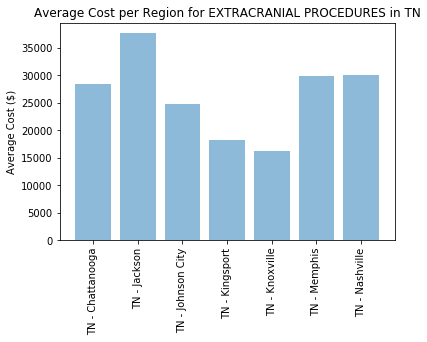

In [380]:
# Create a Bar Chart of the Average Cost per Region for EXTRACRANIAL PROCEDURES in TN

drg_EXTRACRANIAL_TN_Average_Covered_Charge_List_Values = drg_EXTRACRANIAL_TN_Average_Covered_Charge_List
drg_EXTRACRANIAL_TN_Region_List_Values = drg_EXTRACRANIAL_TN_Region_List
x_axis = np.arange(len(drg_EXTRACRANIAL_TN_Region_List))

plt.bar(x_axis, drg_EXTRACRANIAL_TN_Average_Covered_Charge_List_Values, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drg_EXTRACRANIAL_TN_Region_List_Values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Cost per Region for EXTRACRANIAL PROCEDURES in TN")
plt.ylabel("Average Cost ($)")

In [381]:
# Filter the data so that only a specific procedure in Nashville TN is in the dataframe

DataFrame_drg_EXTRACRANIAL_TN_Nashville = DataFrame.loc[(DataFrame["drg_definition"] == "039 - EXTRACRANIAL PROCEDURES W/O CC/MCC") & (DataFrame["provider_state"] == "TN") & (DataFrame["hospital_referral_region_description"] == "TN - Nashville"),:]

DataFrame_drg_EXTRACRANIAL_TN_Nashville.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_medicare_payments,average_medicare_payments_2
881,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440006,SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,11,41660.09,6186.81,5266.45
886,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440029,WILLIAMSON MEDICAL CENTER,4321 CAROTHERS PARKWAY,FRANKLIN,TN,37067,TN - Nashville,23,20155.47,5723.65,4303.86
889,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440035,GATEWAY MEDICAL CENTER,651 DUNLOP LANE,CLARKSVILLE,TN,37040,TN - Nashville,20,27194.25,6021.85,4833.30
890,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440039,VANDERBILT UNIVERSITY HOSPITAL,1161 21ST AVENUE SOUTH,NASHVILLE,TN,37232,TN - Nashville,34,34467.02,9329.14,6471.17
893,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440053,MIDDLE TENNESSEE MEDICAL CENTER INC,1700 MEDICAL CENTER PARKWAY,MURFREESBORO,TN,37129,TN - Nashville,22,25551.63,6651.50,4480.18


In [382]:
# Display a statistical overview of the EXTRACRANIAL PROCEDURES Nashville TN DataFrame for reference

DataFrame_drg_EXTRACRANIAL_TN_Nashville.describe()

,total_discharges,average_covered_charges,average_medicare_payments,average_medicare_payments_2
count,14.000000,14.000000,14.000000,14.000000
mean,26.285714,30091.687857,6346.451429,4964.244286
std,16.647608,12656.813524,901.824318,555.011297
min,11.000000,12781.980000,5684.750000,4303.860000
25%,18.250000,20990.177500,6025.450000,4581.902500
50%,22.500000,27528.955000,6127.570000,4918.355000
75%,25.500000,35934.072500,6341.690000,5120.327500
max,74.000000,56329.570000,9329.140000,6471.170000


In [383]:
# Calculate the Number of Unique Providers that serviced DRG EXTRACRANIAL PROCEDURES in Nashville TN
Unique_Provider_count_drg_EXTRACRANIAL_TN_Nashville = len(DataFrame_drg_EXTRACRANIAL_TN_Nashville["provider_id"].unique())
Unique_Provider_count_drg_EXTRACRANIAL_TN_Nashville

14

In [384]:
# Calculate the Total Number of Discharges for DRG EXTRACRANIAL PROCEDURES in Nasvhville TN
Discharge_Count_drg_EXTRACRANIAL_TN_Nashville = (DataFrame_drg_EXTRACRANIAL_TN_Nashville["total_discharges"].sum())
Discharge_Count_drg_EXTRACRANIAL_TN_Nashville

368

In [351]:
# Cacluate the average covered charges for DRG EXTRACRANIAL PROCEDURES in Nashville TN
Average_Covered_Charges_drg_EXTRACRANIAL_TN_Nashville = DataFrame_drg_EXTRACRANIAL_TN_Nashville["average_covered_charges"].mean()
Average_Covered_Charges_drg_EXTRACRANIAL_TN_Nashville

30091.687857142857

In [352]:
# Cacluate the min covered charge amount for DRG EXTRACRANIAL PROCEDURES in Nashville TN
Min_Covered_Charges_drg_EXTRACRANIAL_TN_Nashville = DataFrame_drg_EXTRACRANIAL_TN_Nashville["average_covered_charges"].min()
Min_Covered_Charges_drg_EXTRACRANIAL_TN_Nashville

12781.98

In [353]:
# Cacluate the max covered charge amount for DRG EXTRACRANIAL PROCEDURES in Nashville TN
Max_Covered_Charges_drg_EXTRACRANIAL_TN_Nashville = DataFrame_drg_EXTRACRANIAL_TN_Nashville["average_covered_charges"].max()
Max_Covered_Charges_drg_EXTRACRANIAL_TN_Nashville

56329.57

In [354]:
# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG EXTRACRANIAL PROCEDURES in Nashville TN
Unique_Provider_ZipCode_Count_drg_EXTRACRANIAL_TN_Nashville = len(DataFrame_drg_EXTRACRANIAL_TN_Nashville["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_EXTRACRANIAL_TN_Nashville

14

In [355]:
# Create a summary data frame to hold the DRG EXTRACRANIAL PROCEDURES in Nashville TN Analysis Results

DRG_Analysis_df_drg_EXTRACRANIAL_TN_Nashville = pd.DataFrame([
    {"Unique Providers that serviced DRG EXTRACRANIAL PROCEDURES in Nashville TN": Unique_Provider_count_drg_EXTRACRANIAL_TN_Nashville, 
     "Unique Provider Zip Codes that serviced DRG EXTRACRANIAL PROCEDURES in Nashville TN": Unique_Provider_ZipCode_Count_drg_EXTRACRANIAL_TN_Nashville, 
     "Total Number of Discharges for DRG EXTRACRANIAL PROCEDURES in Nashville TN": Discharge_Count_drg_EXTRACRANIAL_TN_Nashville,
     "Average Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN": Average_Covered_Charges_drg_EXTRACRANIAL_TN_Nashville,
     "Max Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN": Max_Covered_Charges_drg_EXTRACRANIAL_TN_Nashville,
     "Min Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN": Min_Covered_Charges_drg_EXTRACRANIAL_TN_Nashville
    }
])
DRG_Analysis_df_drg_EXTRACRANIAL_TN_Nashville

,Unique Providers that serviced DRG EXTRACRANIAL PROCEDURES in Nashville TN,Unique Provider Zip Codes that serviced DRG EXTRACRANIAL PROCEDURES in Nashville TN,Total Number of Discharges for DRG EXTRACRANIAL PROCEDURES in Nashville TN,Average Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN,Max Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN,Min Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN
0,14,14,368,30091.687857,56329.57,12781.98


In [356]:
# Give the displayed data to hold the DRG EXTRACRANIAL PROCEDURES in Nasvhille TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_EXTRACRANIAL_TN_Nashville = DRG_Analysis_df_drg_EXTRACRANIAL_TN_Nashville

DRG_Analysis_Formatted_df_drg_EXTRACRANIAL_TN_Nashville["Average Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_EXTRACRANIAL_TN_Nashville["Average Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_EXTRACRANIAL_TN_Nashville["Max Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_EXTRACRANIAL_TN_Nashville["Max Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_EXTRACRANIAL_TN_Nashville["Min Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_EXTRACRANIAL_TN_Nashville["Min Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_EXTRACRANIAL_TN_Nashville

,Unique Providers that serviced DRG EXTRACRANIAL PROCEDURES in Nashville TN,Unique Provider Zip Codes that serviced DRG EXTRACRANIAL PROCEDURES in Nashville TN,Total Number of Discharges for DRG EXTRACRANIAL PROCEDURES in Nashville TN,Average Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN,Max Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN,Min Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN
0,14,14,368,"$30,091.69","$56,329.57","$12,781.98"


In [357]:
# Create list to store data of the Providers in Nashville for the specific procedure

drg_EXTRACRANIAL_TN_Nashville_ProviderList = []

for Provider in DataFrame_drg_EXTRACRANIAL_TN_Nashville["provider_name"]:
    if Provider not in drg_EXTRACRANIAL_TN_Nashville_ProviderList:
        drg_EXTRACRANIAL_TN_Nashville_ProviderList.append(Provider)
        
drg_EXTRACRANIAL_TN_Nashville_ProviderList

['SKYLINE MEDICAL CENTER',
 'WILLIAMSON MEDICAL CENTER',
 'GATEWAY MEDICAL CENTER',
 'VANDERBILT UNIVERSITY HOSPITAL',
 'MIDDLE TENNESSEE MEDICAL CENTER INC',
 'COOKEVILLE REGIONAL MEDICAL CENTER',
 'MAURY REGIONAL HOSPITAL',
 'ST THOMAS HOSPITAL',
 'BAPTIST HOSPITAL',
 'HERITAGE MEDICAL CENTER',
 'HARTON REGIONAL MEDICAL CENTER',
 'SUMMIT MEDICAL CENTER',
 'CENTENNIAL MEDICAL CENTER',
 'UNIVERSITY MEDICAL CENTER']

In [358]:
# Create list to store data of the Average Charge in Nashville for the specific procedure

drg_EXTRACRANIAL_TN_Nashville_Average_Covered_Charge_List = []

for Cost in DataFrame_drg_EXTRACRANIAL_TN_Nashville["average_covered_charges"]:
    if Cost not in drg_EXTRACRANIAL_TN_Nashville_Average_Covered_Charge_List:
        drg_EXTRACRANIAL_TN_Nashville_Average_Covered_Charge_List.append(Cost)
        
drg_EXTRACRANIAL_TN_Nashville_Average_Covered_Charge_List

[41660.09,
 20155.47,
 27194.25,
 34467.02,
 25551.63,
 12781.98,
 23494.3,
 15979.77,
 16534.08,
 27863.66,
 47979.08,
 36221.78,
 35070.95,
 56329.57]

In [359]:
# Create a DataFrame of the Average Cost of Extracranial per Provider in Nashville by merging the lists
Average_Cost_of_Extracranial_per_Provider_Nashvile_df = pd.DataFrame({
    "DRG": "039 - EXTRACRANIAL PROCEDURES W/O CC/MCC",
    "Provider": drg_EXTRACRANIAL_TN_Nashville_ProviderList,
    "Average Cost": drg_EXTRACRANIAL_TN_Nashville_Average_Covered_Charge_List
})
Average_Cost_of_Extracranial_per_Provider_Nashvile_df

,DRG,Provider,Average Cost
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SKYLINE MEDICAL CENTER,41660.09
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,WILLIAMSON MEDICAL CENTER,20155.47
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,GATEWAY MEDICAL CENTER,27194.25
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,VANDERBILT UNIVERSITY HOSPITAL,34467.02
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MIDDLE TENNESSEE MEDICAL CENTER INC,25551.63
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,COOKEVILLE REGIONAL MEDICAL CENTER,12781.98
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MAURY REGIONAL HOSPITAL,23494.30
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ST THOMAS HOSPITAL,15979.77
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,BAPTIST HOSPITAL,16534.08
9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,HERITAGE MEDICAL CENTER,27863.66


Text(0, 0.5, 'Average Cost ($)')

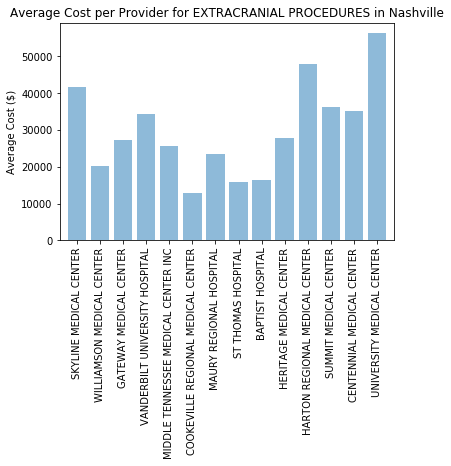

In [360]:
# Create a Bar Chart

AverageCostValue = drg_EXTRACRANIAL_TN_Nashville_Average_Covered_Charge_List
ProviderValues = drg_EXTRACRANIAL_TN_Nashville_ProviderList
x_axis = np.arange(len(drg_EXTRACRANIAL_TN_Nashville_ProviderList))

plt.bar(x_axis, AverageCostValue, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ProviderValues, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Cost per Provider for EXTRACRANIAL PROCEDURES in Nashville")
plt.ylabel("Average Cost ($)")


In [361]:
# Store the Average Cost Data for the specific procedure Grouped by State by splitting up the data into groups based upon 'State'
# Filter the DataFrame down only to those columns to chart
Average_EXTRACRANIAL_Cost_for_data_grouped_by_State = DataFrame_drg_EXTRACRANIAL.groupby(['provider_state'])

# # Convert to DataFrame

Average_EXTRACRANIAL_Cost_for_data_grouped_by_State_df = Average_EXTRACRANIAL_Cost_for_data_grouped_by_State[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

Average_EXTRACRANIAL_Cost_for_data_grouped_by_State_df.head()

,provider_state,average_covered_charges
0,AK,34805.130000
1,AL,32044.436957
2,AR,27463.263125
3,AZ,33443.360417
4,CA,56094.930746


In [362]:
# Create list to store data of the States for the specific procedure

drg_EXTRACRANIAL_State_List = []

for State in Average_EXTRACRANIAL_Cost_for_data_grouped_by_State_df["provider_state"]:
    if State not in drg_EXTRACRANIAL_State_List:
        drg_EXTRACRANIAL_State_List.append(State)
        
drg_EXTRACRANIAL_State_List

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT']

In [363]:
# Create list to store data of the Average Charge by State for the specific procedure

drg_EXTRACRANIAL_Average_Covered_Charge_by_State_List = []

for Cost in Average_EXTRACRANIAL_Cost_for_data_grouped_by_State_df["average_covered_charges"]:
    if Cost not in drg_EXTRACRANIAL_Average_Covered_Charge_by_State_List:
        drg_EXTRACRANIAL_Average_Covered_Charge_by_State_List.append(Cost)
        
drg_EXTRACRANIAL_Average_Covered_Charge_by_State_List

[34805.13,
 32044.436956521735,
 27463.263125,
 33443.360416666656,
 56094.93074626867,
 35252.207,
 21632.006,
 47369.87666666667,
 23966.52,
 42636.67493827161,
 28198.32413793103,
 27809.95,
 22040.68,
 19174.951666666668,
 34146.60019230769,
 26161.89675675676,
 25859.5975,
 22341.830555555553,
 34160.1612,
 21435.6704,
 9633.09,
 14480.656666666668,
 22322.1215,
 25111.747142857144,
 26128.299000000003,
 27475.80533333333,
 18199.575999999997,
 21999.21346153846,
 14450.346666666666,
 23804.47666666667,
 24200.000000000004,
 35103.805161290315,
 32472.882857142857,
 47518.475454545456,
 23260.677608695645,
 28181.944374999992,
 23915.588,
 24634.9375,
 33175.99113636366,
 24913.803333333333,
 33864.16894736842,
 21836.9225,
 26417.3753125,
 31299.569078947363,
 20597.69166666667,
 22684.287142857145,
 17934.35]

In [364]:
# Create a DataFrame of the Average Cost by State for the specific procedure by merging the lists
Average_Cost_of_Extracranial_per_State = pd.DataFrame({
    "DRG": "039 - EXTRACRANIAL PROCEDURES W/O CC/MCC",
    "State": drg_EXTRACRANIAL_State_List,
    "Average Cost": drg_EXTRACRANIAL_Average_Covered_Charge_by_State_List
})
Average_Cost_of_Extracranial_per_State

,DRG,State,Average Cost
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK,34805.130000
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,32044.436957
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AR,27463.263125
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AZ,33443.360417
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA,56094.930746
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CO,35252.207000
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CT,21632.006000
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,DC,47369.876667
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,DE,23966.520000
9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,FL,42636.674938


Text(0, 0.5, 'Average Cost ($)')

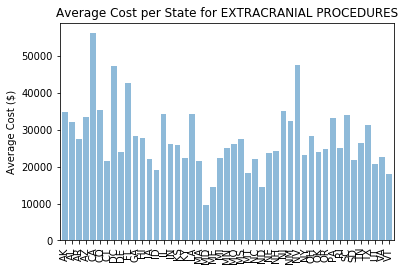

In [365]:
# Create a Bar Chart of the Average Cost per State for EXTRACRANIAL PROCEDURES

drg_EXTRACRANIAL_Average_Covered_Charge_by_State_List_Values = drg_EXTRACRANIAL_Average_Covered_Charge_by_State_List
drg_EXTRACRANIAL_State_List_Values = drg_EXTRACRANIAL_State_List
x_axis = np.arange(len(drg_EXTRACRANIAL_State_List))

plt.bar(x_axis, drg_EXTRACRANIAL_Average_Covered_Charge_by_State_List_Values, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drg_EXTRACRANIAL_State_List_Values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Cost per State for EXTRACRANIAL PROCEDURES")
plt.ylabel("Average Cost ($)")

In [366]:
# Store the Total Discharge Volume Data for the specific procedure Grouped by Provider by splitting up the data into groups based upon 'Provider'
# Filter the DataFrame down only to those columns to chart
EXTRACRANIAL_data_grouped_by_Provider = DataFrame_drg_EXTRACRANIAL.groupby(['provider_name'])

# # Convert to DataFrame

EXTRACRANIAL_Total_Discharge_Volume_for_data_grouped_by_Provider_df = EXTRACRANIAL_data_grouped_by_Provider[["total_discharges"]].sum().reset_index()

# Preview DataFrame

EXTRACRANIAL_Total_Discharge_Volume_for_data_grouped_by_Provider_df.head()

,provider_name,total_discharges
0,ABBOTT NORTHWESTERN HOSPITAL,42
1,ABILENE REGIONAL MEDICAL CENTER,42
2,ABINGTON MEMORIAL HOSPITAL,17
3,ADENA REGIONAL MEDICAL CENTER,34
4,ADVENTIST LA GRANGE MEMORIAL HOSPITAL,14


In [367]:
# Store the Average Charge Data for the specific procedure Grouped by Provider 
# Filter the DataFrame down only to those columns to chart

EXTRACRANIAL_Average_Cost_for_data_grouped_by_Provider_df = EXTRACRANIAL_data_grouped_by_Provider[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

EXTRACRANIAL_Average_Cost_for_data_grouped_by_Provider_df.head()

,provider_name,average_covered_charges
0,ABBOTT NORTHWESTERN HOSPITAL,34628.73
1,ABILENE REGIONAL MEDICAL CENTER,35184.16
2,ABINGTON MEMORIAL HOSPITAL,40088.58
3,ADENA REGIONAL MEDICAL CENTER,22654.52
4,ADVENTIST LA GRANGE MEMORIAL HOSPITAL,36728.92


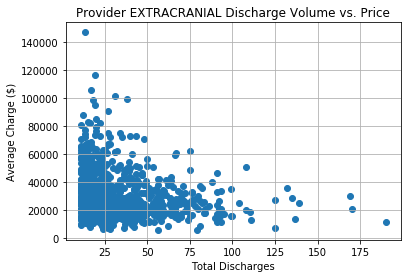

In [368]:
# Build a scatter plot for Total Discharge Volume vs Price
plt.scatter(EXTRACRANIAL_Total_Discharge_Volume_for_data_grouped_by_Provider_df["total_discharges"], EXTRACRANIAL_Average_Cost_for_data_grouped_by_Provider_df["average_covered_charges"], marker="o")

# Incorporate the other graph properties
plt.title("Provider EXTRACRANIAL Discharge Volume vs. Price")
plt.ylabel("Average Charge ($)")
plt.xlabel("Total Discharges")
plt.grid(True)